# BASIC CNN - 2 LAYERS

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from tensorflow.keras import models, layers
from tensorflow.keras import models, layers
from tensorflow.keras.saving import save_model

from keras import Model
from keras.optimizers import Adam, SGD
from keras.models import load_model
from keras.callbacks import EarlyStopping, TensorBoard
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix, precision_recall_curve
from utils.utils import plot_line, plot_metrics, plot_confusion_matrix

In [4]:
data_dir = '..\dataset'

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_images = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    subset="training",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

val_images = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    subset="validation",
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_images = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 80000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [7]:
basic_model = models.Sequential()
basic_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
basic_model.add(layers.MaxPooling2D((2, 2)))
basic_model.add(layers.Dropout(0.2))
basic_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
basic_model.add(layers.MaxPooling2D((2, 2)))
basic_model.add(layers.Dropout(0.2))
basic_model.add(layers.Flatten())
basic_model.add(layers.Dense(128, activation='relu'))
basic_model.add(layers.Dropout(0.5))
basic_model.add(layers.Dense(1, activation='sigmoid')) 

optimizer = Adam(learning_rate=0.001)
basic_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [8]:
callback = EarlyStopping(monitor='val_loss', patience=3)
history = basic_model.fit(train_images, epochs=30, validation_data=val_images, callbacks=[callback])

Epoch 1/30
2500/2500 [==============================] - 3720s 1s/step - loss: 0.4483 - accuracy: 0.7953 - val_loss: 0.4020 - val_accuracy: 0.8227
Epoch 2/30
2500/2500 [==============================] - 252s 101ms/step - loss: 0.3484 - accuracy: 0.8537 - val_loss: 0.3028 - val_accuracy: 0.8753
Epoch 3/30
2500/2500 [==============================] - 201s 80ms/step - loss: 0.3155 - accuracy: 0.8706 - val_loss: 0.2608 - val_accuracy: 0.8942
Epoch 4/30
2500/2500 [==============================] - 203s 81ms/step - loss: 0.2997 - accuracy: 0.8779 - val_loss: 0.2585 - val_accuracy: 0.8979
Epoch 5/30
2500/2500 [==============================] - 204s 82ms/step - loss: 0.2879 - accuracy: 0.8841 - val_loss: 0.2450 - val_accuracy: 0.9000
Epoch 6/30
2500/2500 [==============================] - 196s 78ms/step - loss: 0.2821 - accuracy: 0.8871 - val_loss: 0.2633 - val_accuracy: 0.8927
Epoch 7/30
2500/2500 [==============================] - 200s 80ms/step - loss: 0.2728 - accuracy: 0.8911 - val_loss: 0

In [9]:
save_model(basic_model, '../models/BASIC_CONV')

INFO:tensorflow:Assets written to: ../models/BASIC_CONV\assets


INFO:tensorflow:Assets written to: ../models/BASIC_CONV\assets


In [10]:
basic_model = load_model('../models/BASIC_CONV')

In [11]:
hist_df = pd.DataFrame(history.history)
hist_df.columns = ['train_loss', 'train_acc', 'validation_loss', 'validation_acc']
hist_df.index = hist_df.index + 1
hist_df.to_csv('../history/BASIC_CONV.csv')

In [12]:
loss, accuracy = basic_model.evaluate(test_images)

625/625 [==============================] - 454s 728ms/step - loss: 0.4594 - accuracy: 0.8064


In [13]:
print(f"Loss : {loss}")
print(f"Accuracy : {accuracy}")

Loss : 0.45938441157341003
Accuracy : 0.8064000010490417


In [15]:
y_true = []
y_pred = []
for batch_id in range(len(test_images)):
    batch_images = test_images[batch_id][0]
    batch_labels = test_images[batch_id][1]
    batch_predictions = basic_model.predict(batch_images)
    batch_predictions = (batch_predictions > 0.5).astype(int)
    y_true.extend(batch_labels)
    y_pred.extend(batch_predictions)

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


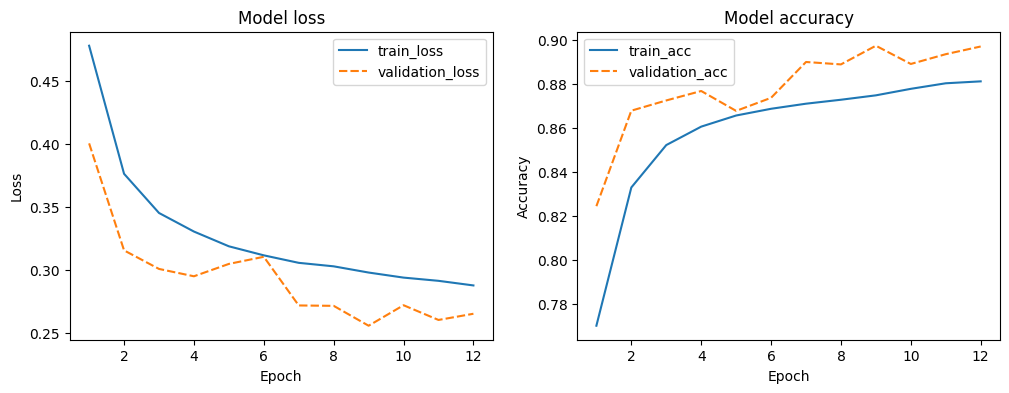

In [16]:
plot_line(hist_df)

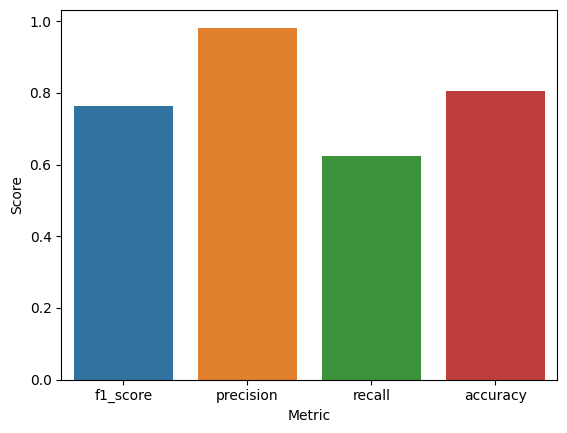

In [17]:
plot_metrics(y_true, y_pred)

In [18]:
# Calculate f1 score, precision and recall
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)

# Print the metrics
print('The f1 score on the test images is:', f1)
print('The precision on the test images is:', prec)
print('The recall on the test images is:', rec)
print('The accuracy score on the test images is:', acc)

The f1 score on the test images is: 0.7632383514736455
The precision on the test images is: 0.9822159269751338
The recall on the test images is: 0.6241
The accuracy score on the test images is: 0.8064


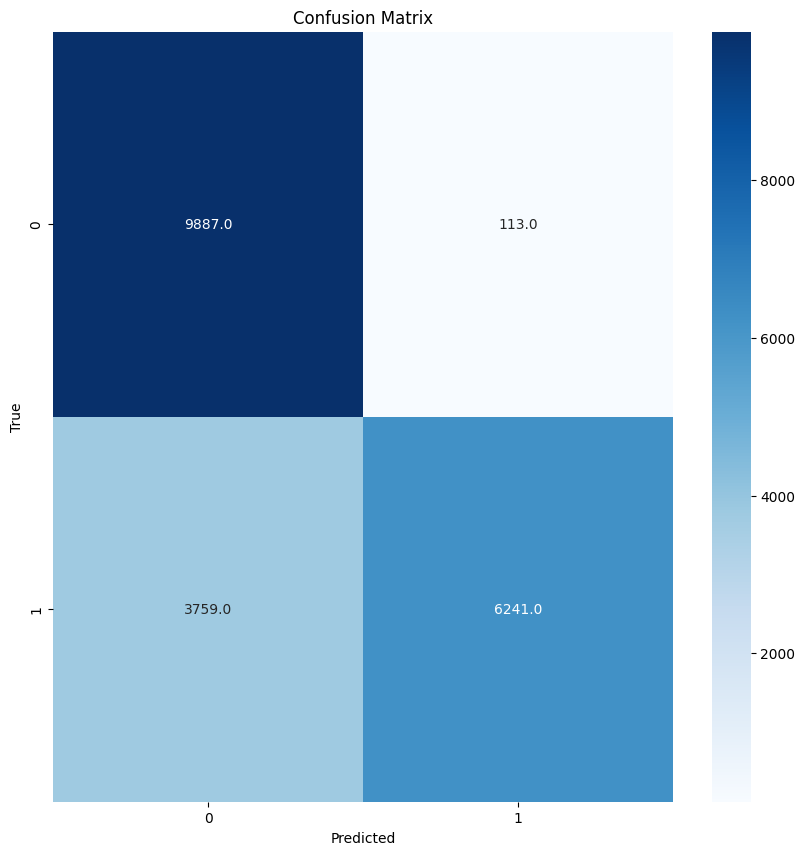

In [19]:
plot_confusion_matrix(y_true, y_pred)

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [26]:
history_cnn = model.fit(train_images, epochs=30, validation_data=val_images, callbacks=[callback])

Epoch 1/30
2500/2500 [==============================] - 99s 39ms/step - loss: 0.4679 - accuracy: 0.7783 - val_loss: 0.3763 - val_accuracy: 0.8332
Epoch 2/30
2500/2500 [==============================] - 97s 39ms/step - loss: 0.3687 - accuracy: 0.8399 - val_loss: 0.3468 - val_accuracy: 0.8502
Epoch 3/30
2500/2500 [==============================] - 97s 39ms/step - loss: 0.3404 - accuracy: 0.8531 - val_loss: 0.3200 - val_accuracy: 0.8647
Epoch 4/30
2500/2500 [==============================] - 98s 39ms/step - loss: 0.3248 - accuracy: 0.8615 - val_loss: 0.2901 - val_accuracy: 0.8763
Epoch 5/30
2500/2500 [==============================] - 97s 39ms/step - loss: 0.3106 - accuracy: 0.8690 - val_loss: 0.2938 - val_accuracy: 0.8756
Epoch 6/30
2500/2500 [==============================] - 98s 39ms/step - loss: 0.3039 - accuracy: 0.8727 - val_loss: 0.2915 - val_accuracy: 0.8764
Epoch 7/30
2500/2500 [==============================] - 99s 40ms/step - loss: 0.3036 - accuracy: 0.8734 - val_loss: 0.2826 -

In [27]:
save_model(model, '../models/BASIC_CONV_3')
model = load_model('../models/BASIC_CONV_3')
history_cnn = pd.DataFrame(history_cnn.history)
history_cnn.columns = ['train_loss', 'train_acc', 'validation_loss', 'validation_acc']
history_cnn.index = history_cnn.index + 1
history_cnn.to_csv('../history/BASIC_CONV_3.csv')

INFO:tensorflow:Assets written to: ../models/BASIC_CONV_3\assets


INFO:tensorflow:Assets written to: ../models/BASIC_CONV_3\assets


In [28]:
loss, accuracy = model.evaluate(test_images)

625/625 [==============================] - 13s 20ms/step - loss: 0.5571 - accuracy: 0.7964


In [29]:
y_true = []
y_pred = []
for batch_id in range(len(test_images)):
    batch_images = test_images[batch_id][0]
    batch_labels = test_images[batch_id][1]
    batch_predictions = model.predict(batch_images)
    batch_predictions = (batch_predictions > 0.5).astype(int)
    y_true.extend(batch_labels)
    y_pred.extend(batch_predictions)

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


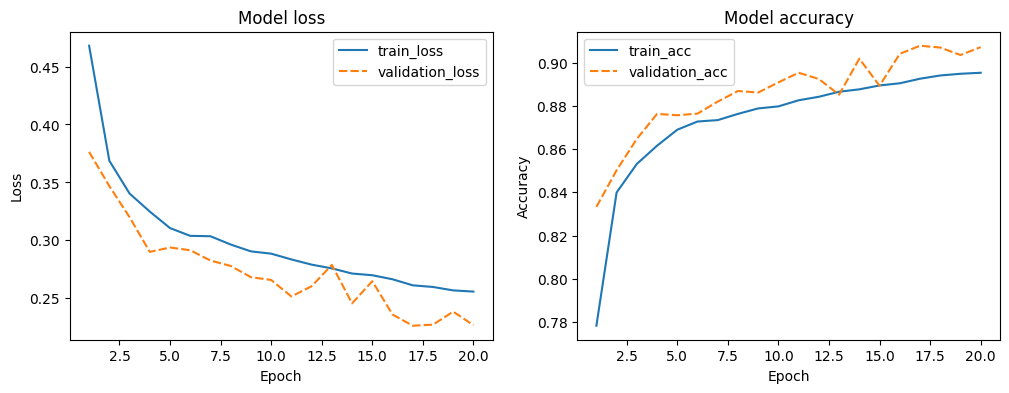

In [30]:
plot_line(history_cnn)

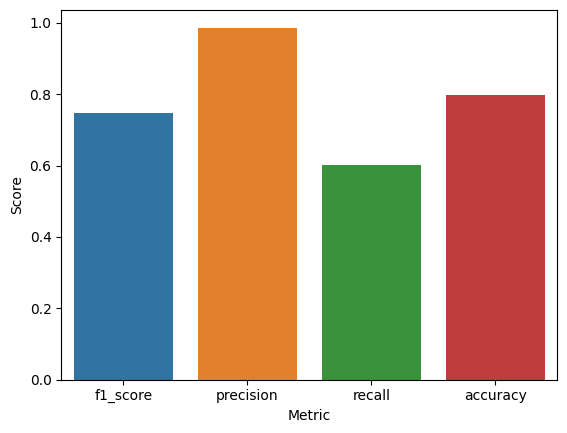

In [31]:
plot_metrics(y_true, y_pred)

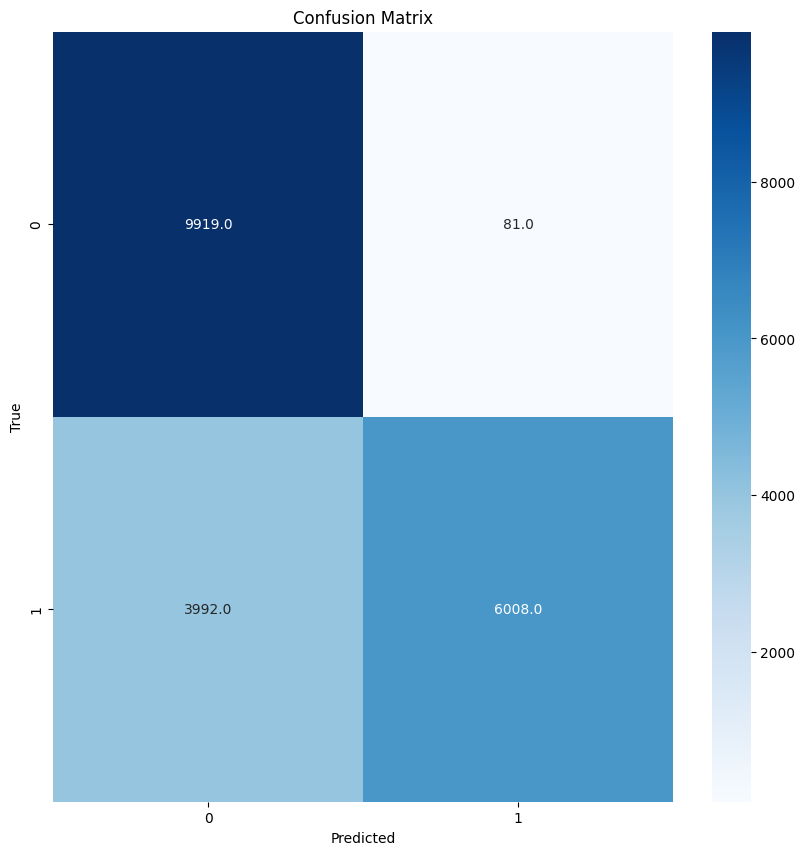

In [32]:
plot_confusion_matrix(y_true, y_pred)

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [35]:
history_cnn2 = model.fit(train_images, epochs=30, validation_data=val_images, callbacks=[callback])

Epoch 1/30
2500/2500 [==============================] - 177s 71ms/step - loss: 0.5983 - accuracy: 0.6871 - val_loss: 0.5788 - val_accuracy: 0.7219
Epoch 2/30
2500/2500 [==============================] - 161s 65ms/step - loss: 0.5335 - accuracy: 0.7481 - val_loss: 0.5480 - val_accuracy: 0.7474
Epoch 3/30
2500/2500 [==============================] - 115s 46ms/step - loss: 0.5223 - accuracy: 0.7573 - val_loss: 0.4980 - val_accuracy: 0.7616
Epoch 4/30
2500/2500 [==============================] - 116s 46ms/step - loss: 0.5134 - accuracy: 0.7626 - val_loss: 0.4828 - val_accuracy: 0.7754
Epoch 5/30
2500/2500 [==============================] - 119s 47ms/step - loss: 0.5077 - accuracy: 0.7671 - val_loss: 0.4879 - val_accuracy: 0.7710
Epoch 6/30
2500/2500 [==============================] - 110s 44ms/step - loss: 0.5043 - accuracy: 0.7704 - val_loss: 0.5003 - val_accuracy: 0.7676
Epoch 7/30
2500/2500 [==============================] - 114s 45ms/step - loss: 0.5096 - accuracy: 0.7661 - val_loss: 0

In [36]:
loss, accuracy = model.evaluate(test_images)

625/625 [==============================] - 9s 15ms/step - loss: 0.7167 - accuracy: 0.6201


In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [40]:
history_cnn3 = model.fit(train_images, epochs=100, validation_data=val_images, callbacks=[callback])

Epoch 1/100
2500/2500 [==============================] - 93s 37ms/step - loss: 0.6944 - accuracy: 0.5107 - val_loss: 0.6892 - val_accuracy: 0.5415
Epoch 2/100
2500/2500 [==============================] - 97s 39ms/step - loss: 0.6886 - accuracy: 0.5396 - val_loss: 0.6847 - val_accuracy: 0.5855
Epoch 3/100
2500/2500 [==============================] - 100s 40ms/step - loss: 0.6839 - accuracy: 0.5618 - val_loss: 0.6791 - val_accuracy: 0.5915
Epoch 4/100
2500/2500 [==============================] - 100s 40ms/step - loss: 0.6761 - accuracy: 0.5871 - val_loss: 0.6686 - val_accuracy: 0.6126
Epoch 5/100
2500/2500 [==============================] - 100s 40ms/step - loss: 0.6635 - accuracy: 0.6087 - val_loss: 0.6510 - val_accuracy: 0.6328
Epoch 6/100
2500/2500 [==============================] - 95s 38ms/step - loss: 0.6432 - accuracy: 0.6365 - val_loss: 0.6285 - val_accuracy: 0.6440
Epoch 7/100
2500/2500 [==============================] - 93s 37ms/step - loss: 0.6158 - accuracy: 0.6664 - val_loss

In [41]:
loss, accuracy = model.evaluate(test_images)

625/625 [==============================] - 156s 250ms/step - loss: 0.5511 - accuracy: 0.7731


In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(128, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [43]:
history_cnn3 = model.fit(train_images, epochs=100, validation_data=val_images, callbacks=[callback])

Epoch 1/100
2500/2500 [==============================] - 90s 36ms/step - loss: 0.5005 - accuracy: 0.7557 - val_loss: 0.3985 - val_accuracy: 0.8159
Epoch 2/100
2500/2500 [==============================] - 91s 36ms/step - loss: 0.4087 - accuracy: 0.8166 - val_loss: 0.3787 - val_accuracy: 0.8299
Epoch 3/100
2500/2500 [==============================] - 91s 36ms/step - loss: 0.3733 - accuracy: 0.8374 - val_loss: 0.3214 - val_accuracy: 0.8613
Epoch 4/100
2500/2500 [==============================] - 91s 36ms/step - loss: 0.3538 - accuracy: 0.8464 - val_loss: 0.3222 - val_accuracy: 0.8618
Epoch 5/100
2500/2500 [==============================] - 91s 36ms/step - loss: 0.3415 - accuracy: 0.8528 - val_loss: 0.3025 - val_accuracy: 0.8708
Epoch 6/100
2500/2500 [==============================] - 91s 36ms/step - loss: 0.3299 - accuracy: 0.8589 - val_loss: 0.3201 - val_accuracy: 0.8604
Epoch 7/100
2500/2500 [==============================] - 90s 36ms/step - loss: 0.3217 - accuracy: 0.8629 - val_loss: 0

In [44]:
loss, accuracy = model.evaluate(test_images)

625/625 [==============================] - 8s 13ms/step - loss: 0.4776 - accuracy: 0.7964
